<img src="img/title_01.png">

<img src="img/title_notebook01.jpg">

# Hello, FedGIS

In [149]:
1+2

3

In [150]:
import arcgis

In [151]:
gis = arcgis.gis.GIS(url="https://idt.esri.com/portal", username="anieto")

Enter password: ········


In [144]:
gis = arcgis.gis.GIS(url="https://ndirt.maps.arcgis.com", username="ANieto_ndirt")

Enter password: ········


In [131]:
gis_app_id = r"wt3QUR1M4eum0TVI"
gis_url = r"https://esrifederal.maps.arcgis.com"
esrifed_gis = arcgis.gis.GIS(gis_url, client_id=gis_app_id)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://esrifederal.maps.arcgis.com/sharing/rest/oauth2/authorize?client_id=wt3QUR1M4eum0TVI&response_type=code&expiration=-1&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob
Enter code obtained on signing in using SAML: ········


In [145]:
m = gis.map('Washington DC')
m

<Item title:"BlockGroupsDC_Styled" type:Feature Layer Collection owner:jfraley_ndirt>
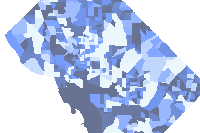

<Item title:"DCBlocks_styled" type:Feature Layer Collection owner:jfraley_ndirt>
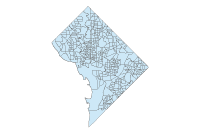

<Item title:"BlockGroupsDC" type:Feature Layer Collection owner:jfraley_ndirt>
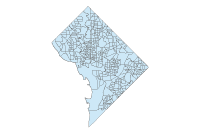

<Item title:"Federal_Buildings_in_DC" type:Feature Layer Collection owner:ANieto_ndirt>
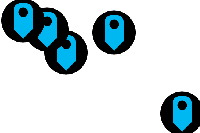

<Item title:"DC_Convention_Center" type:Feature Layer Collection owner:ANieto_ndirt>
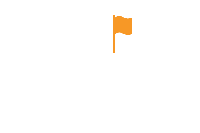

In [148]:
items = gis.content.search("Washington DC", item_type="feature layer")
for item in items:
    display(item)

In [142]:
convention_center = items[0]
brutalist_buildings = items[1]

m2 = gis.map('Washington DC', zoomlevel=13)
display(m2)

m2.add_layer([convention_center, brutalist_buildings])

## Analysis

In [143]:
best_walking_route = arcgis.network.analysis.find_routes(brutalist_buildings.layers[0].query(),
                                                         reorder_stops_to_find_optimal_routes=True,
                                                         travel_mode="Walking Time",
                                                         impedance="Walk Time",
                                                         gis=ndirt_gis)

WARNING 030194: Data values longer than 500 characters from input field [Stops::Name] are truncated.
Location "Department of Transportation" in "Stops" is on a soft-restricted network element.
Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Avoid Private Roads").



In [66]:
arcgis.network.analysis.find_routes?

In [74]:
route_stops_fset = brutalist_buildings.layers[0].query()

In [83]:
architecture_route = arcgis.network.analysis.find_routes(route_stops_fset,
                                                         reorder_stops_to_find_optimal_routes=True,
                                                         travel_mode="Walking Time",
                                                         impedance="Walk Time",
                                                         gis=esrifed_gis)

In [84]:
architecture_route.output_routes.df

,FirstStopOID,LastStopOID,Name,OID,Shape_Length,StopCount,Total_Kilometers,Total_Miles,Total_Minutes,SHAPE
0,1,7,Federal Bureau of Investigation - Department o...,1,0.058706,7,5.718477,3.5533,68.621724,"{'paths': [[[-77.02497482299998, 38.8961300000..."


In [103]:
m2 = esrifed_gis.map('Washington DC')
m2

In [86]:
m2.draw(architecture_route.output_routes)

In [104]:
m2.basemaps

['streets',
 'satellite',
 'hybrid',
 'topo',
 'gray',
 'dark-gray',
 'oceans',
 'national-geographic',
 'terrain',
 'osm']

In [99]:
visualize_find_routes_results(m2, architecture_route, zoom_level=14)

In [96]:
import time

def visualize_find_routes_results(map_widget, find_routes_result, zoom_level):
    # The map widget
    m = map_widget
    m.basemap = 'streets-night-vector'
    # The find_routes result
    result = find_routes_result
    
    # 1. Parse the find-routes analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    lines_df = result.output_routes.df
    lines_fset = arcgis.features.FeatureSet.from_dataframe(lines_df)
    
    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.7}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    time.sleep(1.5)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_4)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_1)
    
    m.zoom = zoom_level

## Results
- Query on a table
- Show on the map

In [70]:
routes_layer = architecture_route['routes_layer']
assigned_stops_layer = architecture_route['assigned_stops_layer']

In [81]:
df = assigned_stops_layer.query().df
df[['FromPrevDistance', 'FromPrevTravelTime', 'description', 'pic_url', 'thumb_url']]

,FromPrevDistance,FromPrevTravelTime,description,pic_url,thumb_url
0,0.000000,0.000000,None,None,None
1,1.684940,32.539769,The Hubert H. Humphrey Building is a low-rise ...,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
2,1.219890,23.558673,Headquarters of the U.S. Department of Transpo...,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
3,1.582205,30.555745,The Robert C. Weaver Federal Building is a 10-...,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
4,0.457887,8.842770,The James V. Forrestal Building is a low-rise ...,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
5,0.362608,7.002734,The Jamie L. Whitten Building houses the admin...,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
6,0.527256,10.182436,The Ronald Reagan Building and International T...,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
7,0.426565,8.237871,The J. Edgar Hoover Building is a high-rise of...,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
8,0.768827,14.847693,None,None,None


### TODO - Add images, animation of stops

In [76]:
m.add_layer(routes_layer)
m.add_layer(assigned_stops_layer)